In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dt = pd.read_csv('genres.csv')

In [25]:
dt.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [26]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
genre_id     163 non-null int64
#tracks      163 non-null int64
parent       163 non-null int64
title        163 non-null object
top_level    163 non-null int64
dtypes: int64(4), object(1)
memory usage: 6.4+ KB


In [27]:
dt.describe()

,genre_id,#tracks,parent,top_level
count,163.000000,163.000000,163.000000,163.000000
mean,254.116564,2142.085890,60.447853,51.374233
std,265.048642,5199.542574,185.396011,211.470836
min,1.000000,0.000000,0.000000,2.000000
25%,60.500000,125.000000,5.000000,5.000000
50%,172.000000,563.000000,15.000000,12.000000
75%,400.500000,1846.500000,38.000000,20.000000
max,1235.000000,38154.000000,1235.000000,1235.000000


In [28]:
df = dt[['genre_id', '#tracks', 'parent', 'top_level']].dropna()

# EDA

In [29]:
sns.set_style('whitegrid')

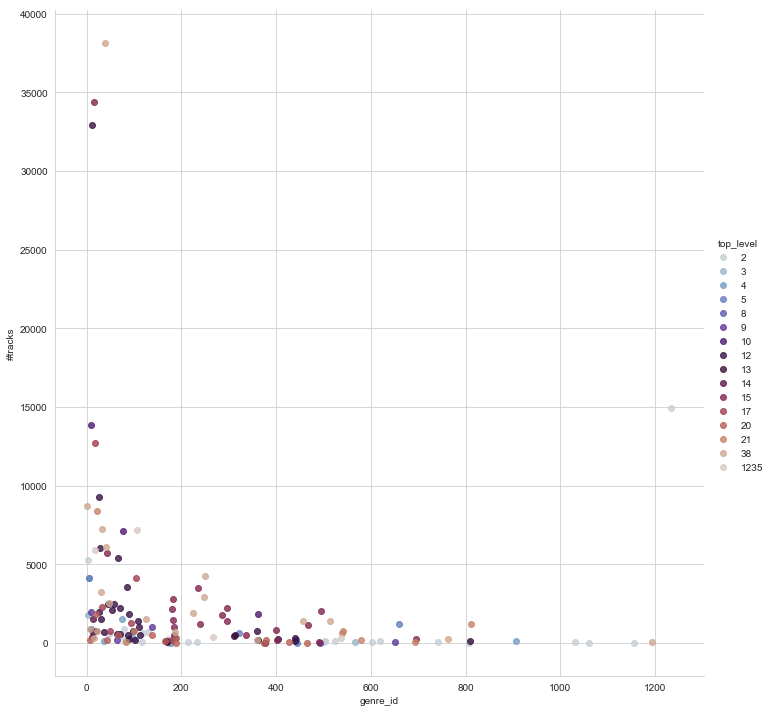

In [30]:
sns.lmplot('genre_id', '#tracks', data = df, palette = 'twilight',hue='top_level',  height = 10, aspect = 1, fit_reg = False)

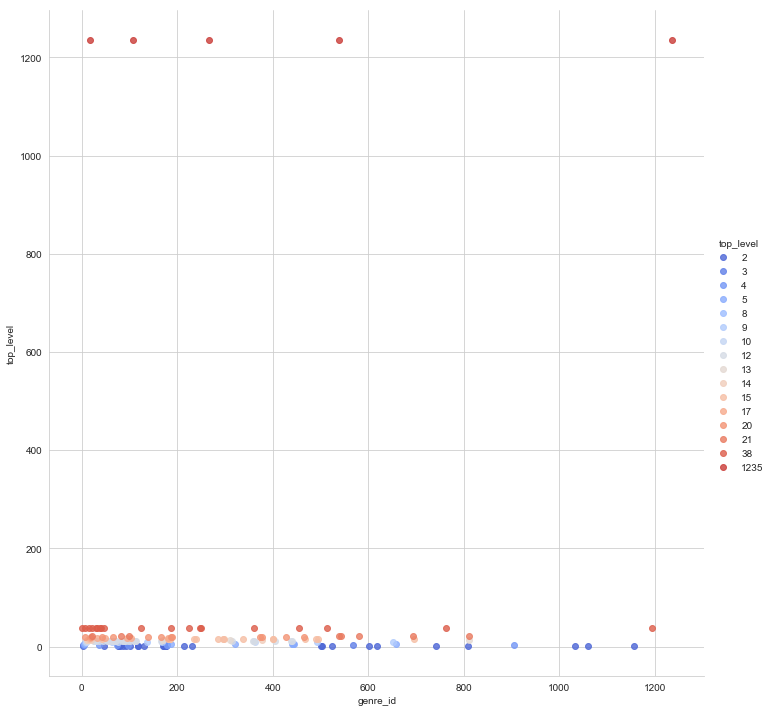

In [31]:
sns.set_style('whitegrid')
sns.lmplot('genre_id', 'top_level', data = df, palette = 'coolwarm',hue = 'top_level', height = 10, aspect = 1, fit_reg = False)

# KMeans clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
X[:10]

array([[-0.95792449,  1.26378461, -0.12145369, -0.06343876],
       [-0.95413998,  0.60362164, -0.32705198, -0.23419961],
       [-0.95035546, -0.07525431, -0.32705198, -0.22945626],
       [-0.94657094,  0.38273134, -0.32705198, -0.2247129 ],
       [-0.94278642,  0.37887299, -0.32705198, -0.21996954],
       [-0.9390019 , -0.236919  , -0.12145369, -0.06343876],
       [-0.93521738, -0.37138236, -0.21884236, -0.14881919],
       [-0.93143286, -0.2457932 , -0.32705198, -0.20573947],
       [-0.92764834, -0.02991875, -0.32705198, -0.20099612],
       [-0.92386382,  2.2576945 , -0.32705198, -0.19625276]])

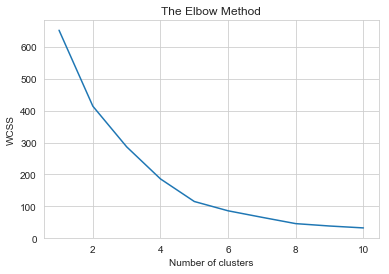

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [37]:
kmeans.inertia_

413.8659876294346

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [39]:
kmeans.inertia_

286.51327414896076

In [40]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [41]:
kmeans.inertia_

185.93728090722436

In [42]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [43]:
kmeans.inertia_

115.17892274181602

In [44]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [45]:
kmeans.inertia_

86.00391903693827

In [60]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

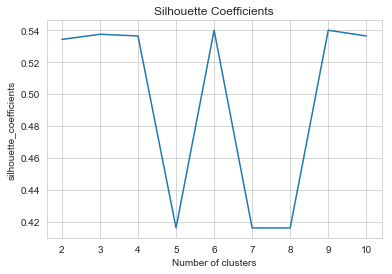

In [61]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [56]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [57]:
kmeans_silhouette

0.7880489011751795

In [58]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [59]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [60]:
kmeans_silhouette

0.5460868512600557

In [61]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [62]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [63]:
kmeans_silhouette

0.5568481123944062

In [64]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [65]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [66]:
kmeans_silhouette

0.7977678109641996

In [71]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [72]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [73]:
kmeans_silhouette

0.5649963739662311

In [74]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [75]:
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

In [76]:
kmeans_silhouette

0.5327495508269214

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

In [62]:
## From the inertia and sillhouette score values, we find the appropriate value of k(and no. of clusters ) to be 3.

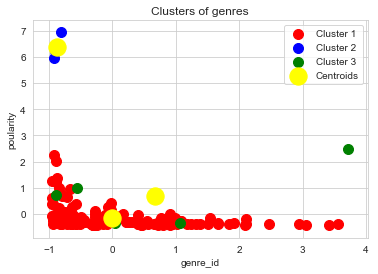

In [78]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of genres')
plt.xlabel('genre_id')
plt.ylabel('poularity')
plt.legend()
plt.show()

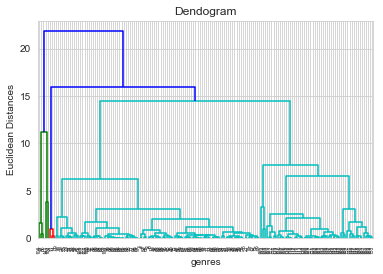

In [63]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel('genres')
plt.ylabel('Euclidean Distances')
plt.show()